# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


## Relationship Between Weather Variables and Latitude

In [103]:
# API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "q=" + city + "&appid=" + weather_api_key + "&units=" + units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-joseph
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | iquitos
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | okha
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | lucas
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | tosontsengel
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | at taj
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | zhetybay
City not found. Skipping...
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | kyshtovka
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of 

In [113]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [115]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-joseph,-21.3667,55.6167,27.21,83,86,2.77,RE,1738270303
1,grytviken,-54.2811,-36.5092,5.13,74,37,8.31,GS,1738270304
2,iquitos,-3.7481,-73.2472,33.02,52,40,2.57,PE,1738270305
3,petropavlovsk-kamchatsky,53.0452,158.6483,-3.67,46,75,7.00,RU,1738270306
4,okha,53.5739,142.9478,-12.83,96,100,5.91,RU,1738270307


In [123]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [125]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,27.21,83,86,2.77,RE,1738270303
1,grytviken,-54.2811,-36.5092,5.13,74,37,8.31,GS,1738270304
2,iquitos,-3.7481,-73.2472,33.02,52,40,2.57,PE,1738270305
3,petropavlovsk-kamchatsky,53.0452,158.6483,-3.67,46,75,7.00,RU,1738270306
4,okha,53.5739,142.9478,-12.83,96,100,5.91,RU,1738270307


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

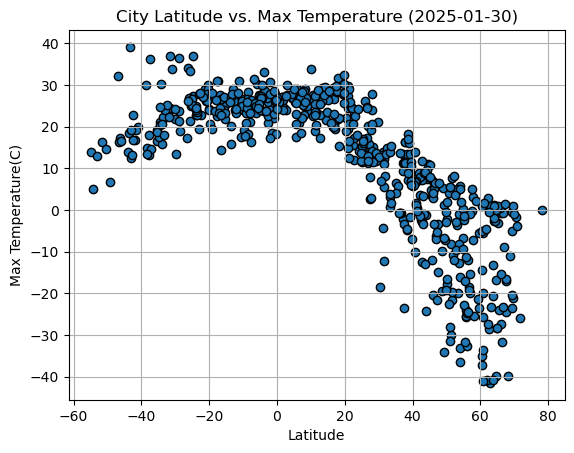

In [192]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2025-01-30)")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

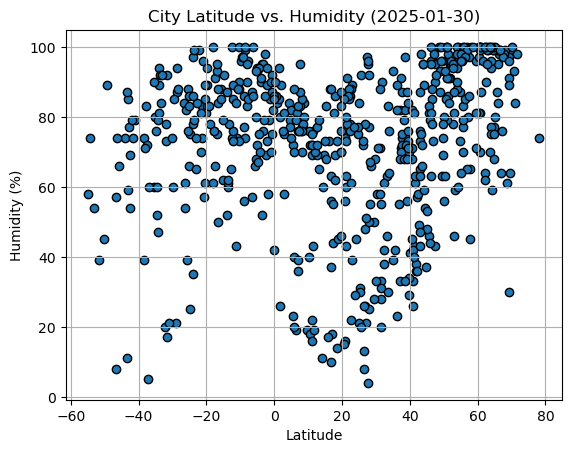

In [190]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-01-30)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

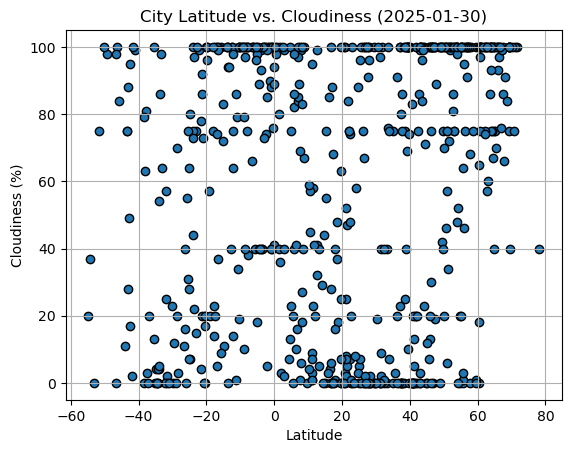

In [188]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolors='black')
plt.title("City Latitude vs. Cloudiness (2025-01-30)")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2025-01-30)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

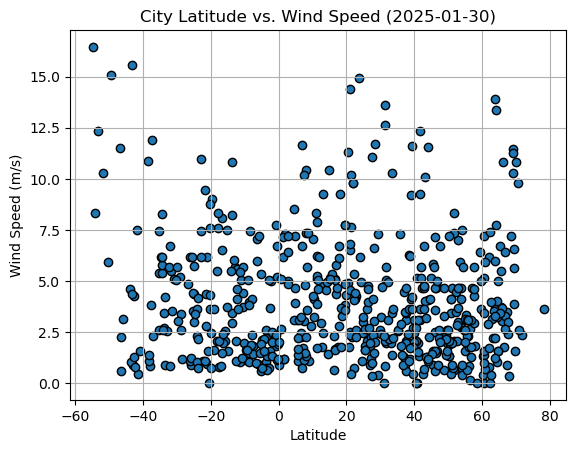

In [184]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-01-30)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [226]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x,y):
    slope, intercept, r, p, std_err = linregress(x,y)
    
    y_axis = list(map((lambda x_valus: slope * x_valus + intercept), x))

    plt.plot(x, y_axis, color= 'red')

    equation = f"y={slope:.2f}x + {intercept:.2f}"
    plt.text(min(x),min(y), equation, fontsize= 15, color='red', verticalalignment='top')

    print(f'The r^2 value is: {np.square(r)}')
    

In [151]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,petropavlovsk-kamchatsky,53.0452,158.6483,-3.67,46,75,7.00,RU,1738270306
4,okha,53.5739,142.9478,-12.83,96,100,5.91,RU,1738270307
5,albany,42.6001,-73.9662,-2.46,49,86,0.45,US,1738270054
7,lucas,41.6501,-83.6666,8.08,61,0,3.60,US,1738270310
8,georgetown,5.4112,100.3354,25.96,72,20,3.09,MY,1738270075


In [153]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,27.21,83,86,2.77,RE,1738270303
1,grytviken,-54.2811,-36.5092,5.13,74,37,8.31,GS,1738270304
2,iquitos,-3.7481,-73.2472,33.02,52,40,2.57,PE,1738270305
6,port elizabeth,-33.9180,25.5701,21.29,94,54,2.68,ZA,1738270309
10,carnarvon,-24.8667,113.6333,27.45,75,7,4.34,AU,1738270313


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.6796839633221561


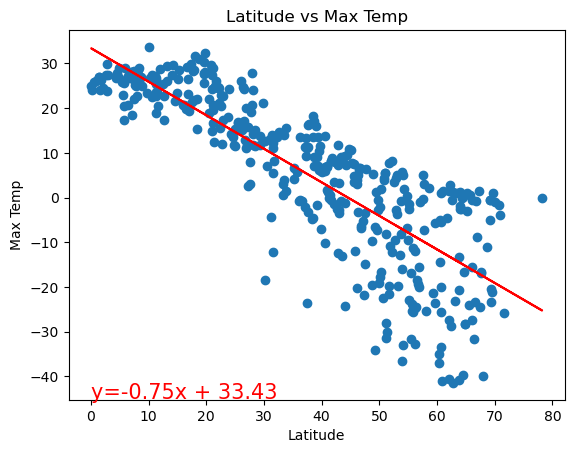

In [228]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.16558764681046545


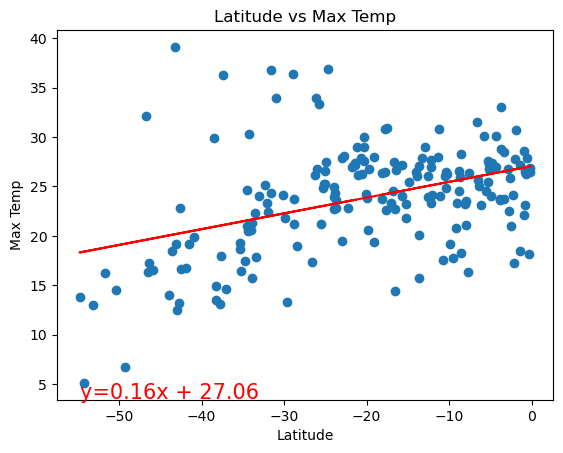

In [230]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.15709969493290613


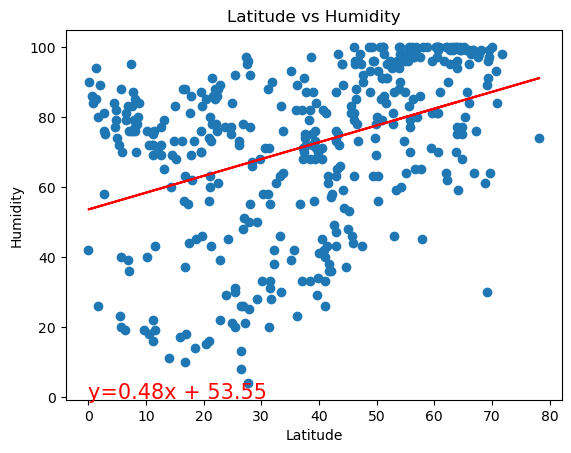

In [232]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.14053396591559186


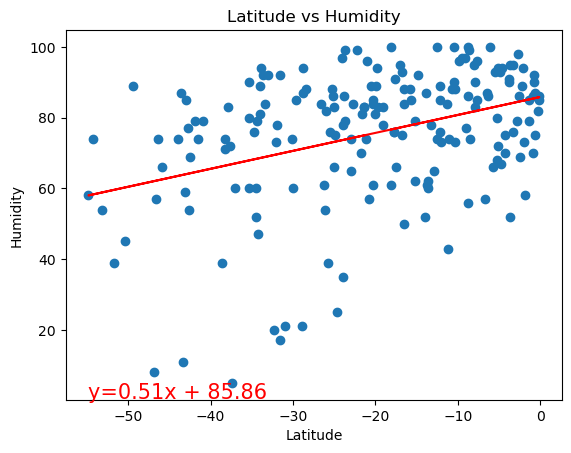

In [234]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.12088655942584088


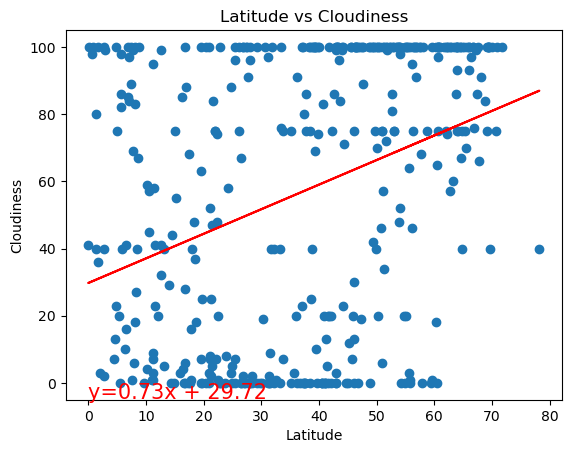

In [236]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.12812354156066225


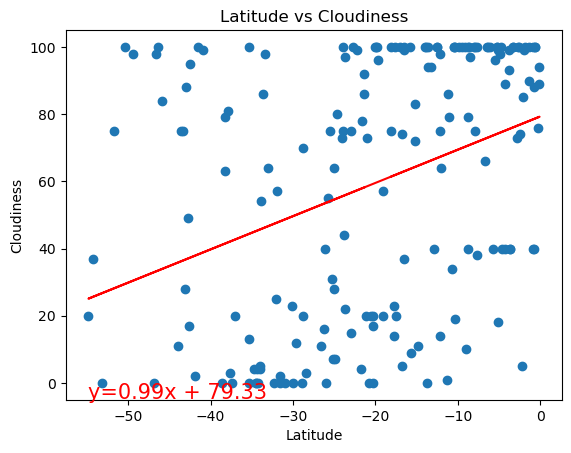

In [238]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.008492793410881166


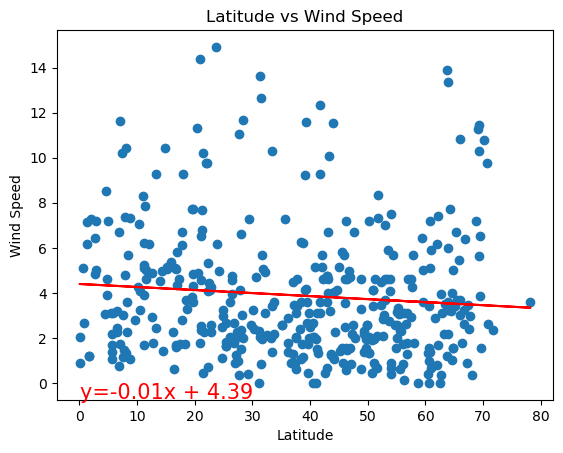

In [240]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.11685113778130879


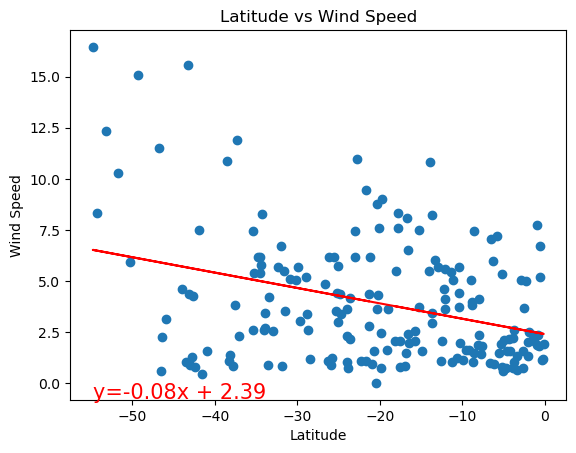

In [242]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE